In [496]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
import math

In [541]:
path="pexels-anjana-c-169994-674010.jpg"

In [542]:
import os

print("Path to image:", path)
print("File exists:", os.path.exists(path))

Path to image: pexels-anjana-c-169994-674010.jpg
File exists: True


In [543]:
image= Image.open(path)

In [544]:
image.size

(2976, 3968)

In [545]:
image.mode

'RGB'

In [546]:
image.format

'JPEG'

In [503]:
image= image.resize((300,300))

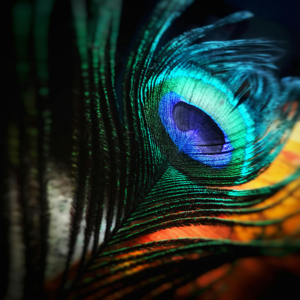

In [504]:
image

In [505]:
arr= np.array(image)

In [506]:
arr.shape

(300, 300, 3)

In [507]:
pixels= arr.reshape(300*300,3)

In [508]:
pixels.shape

(90000, 3)

In [509]:
pixels.size

270000

In [510]:
pixels

array([[3, 3, 3],
       [3, 3, 3],
       [3, 3, 3],
       ...,
       [3, 3, 3],
       [3, 3, 3],
       [3, 3, 3]], dtype=uint8)

#Kmeans code

selecting random centroids

In [511]:
def initialize_centroids(pixels, k):
    indices = random.sample(range(len(pixels)), k)
    centroids = pixels[indices]
    return centroids

In [512]:
type(pixels[random.sample(range(len(pixels)), K)])

numpy.ndarray

In [513]:
pixels[random.sample(range(len(pixels)), 5)]

array([[ 8,  8,  6],
       [ 8, 15, 13],
       [ 8, 11, 11],
       [10, 21, 22],
       [ 8, 37, 45]], dtype=uint8)

finding distance from each point to nearest centroid

In [514]:
def find_closest_centroids(pixels, centroids):
    idx=[]
    K = centroids.shape[0]
    for i in pixels:
        dist=[]
        for j in centroids:
            #value=(i[0]-j[0])**2 + (i[1]-j[1])**2
            value= np.linalg.norm(i-j)
            dist.append(value)
        idx.append(dist.index(min(dist)))
                
    return np.array(idx)

In [515]:
# point = np.array([100, 150, 200])         # shape: (3,)
# centroids = np.array([[120, 160, 190],    # shape: (k, 3)
#                       [90, 140, 210],
#                       [200, 200, 200]])
# # Euclidean distances from point to each centroid
# distances = np.linalg.norm(centroids - point, axis=1)

In [516]:
def compute_centroids(pixels, idx, K): 
    
    centroids = []

    for i in range(K):
        group=[]
        for j in range(idx.shape[0]):
            if(i==idx[j]):
                group.append(pixels[j])
        if(len(group)>0):
            centroids.append(np.array(group).mean(0))
        else:
            centroids.append(pixels[np.random.randint(0, pixels.shape[0])])
    return np.array(centroids)

In [517]:
pixels.shape

(90000, 3)

In [518]:
K=20
centroids= initialize_centroids(pixels,K)

In [519]:
for i in range(10):
    idx= find_closest_centroids(pixels,centroids)
    centroids= compute_centroids(pixels,idx,K)

In [520]:
centroids

array([[ 65.5004985 , 225.1445663 , 215.8820206 ],
       [ 22.12869128,  25.85033557,  16.16090604],
       [ 64.63188559,  67.61175847,  48.32150424],
       [149.22672353, 160.72707889, 137.89623312],
       [235.46992481, 165.44844253,  62.69978518],
       [ 25.09589652,  11.20049063,   4.35057984],
       [119.61910377,  52.6067217 ,  13.03537736],
       [  9.36028716,   9.51072894,   5.950852  ],
       [ 21.37268933,  95.6265156 , 109.93738819],
       [100.32549505, 110.18997525,  84.82982673],
       [  9.19115526,  19.42332959,  11.84457619],
       [196.29238579,  99.22030457,  19.15329949],
       [ 39.12354026,  44.59526736,  29.42224954],
       [ 18.24605678,  67.43675079,  64.31214511],
       [ 12.22663512,  40.15463918,  37.33919216],
       [ 23.82004981, 159.7739726 , 160.19178082],
       [ 54.74553571,  98.97831633, 208.61352041],
       [  4.79374389,  15.87702835,  25.57751711],
       [  4.1886113 ,   4.33866006,   3.81566509],
       [ 58.31737226,  23.57722

In [521]:
type(centroids)

numpy.ndarray

In [522]:
centroids.shape

(20, 3)

In [523]:
type(idx)

numpy.ndarray

In [524]:
idx.shape

(90000,)

In [525]:
set(idx)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [526]:
compressed_pixels=[]
for i in range(idx.shape[0]):
    compressed_pixels.append(centroids[idx[i]])

In [527]:
compressed_pixels= np.array(compressed_pixels)

In [528]:
compressed_img_pixels=compressed_pixels.reshape(arr.shape)

In [529]:
compressed_img_pixels.shape

(300, 300, 3)

In [530]:
type(compressed_img_pixels)

numpy.ndarray

In [531]:
compressed_img_pixels

array([[[ 4.1886113 ,  4.33866006,  3.81566509],
        [ 4.1886113 ,  4.33866006,  3.81566509],
        [ 4.1886113 ,  4.33866006,  3.81566509],
        ...,
        [ 4.79374389, 15.87702835, 25.57751711],
        [ 4.79374389, 15.87702835, 25.57751711],
        [ 4.79374389, 15.87702835, 25.57751711]],

       [[ 4.1886113 ,  4.33866006,  3.81566509],
        [ 4.1886113 ,  4.33866006,  3.81566509],
        [ 4.1886113 ,  4.33866006,  3.81566509],
        ...,
        [ 4.79374389, 15.87702835, 25.57751711],
        [ 4.79374389, 15.87702835, 25.57751711],
        [ 4.79374389, 15.87702835, 25.57751711]],

       [[ 4.1886113 ,  4.33866006,  3.81566509],
        [ 4.1886113 ,  4.33866006,  3.81566509],
        [ 4.1886113 ,  4.33866006,  3.81566509],
        ...,
        [ 4.79374389, 15.87702835, 25.57751711],
        [ 4.79374389, 15.87702835, 25.57751711],
        [ 4.79374389, 15.87702835, 25.57751711]],

       ...,

       [[ 4.1886113 ,  4.33866006,  3.81566509],
        [ 4

In [532]:
img = Image.fromarray((compressed_img_pixels).astype('uint8'))

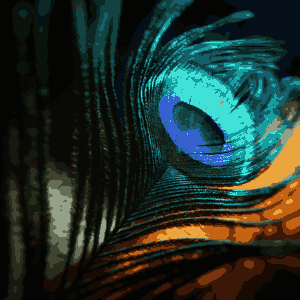

In [533]:
img

In [534]:
new= img.resize(image.size)

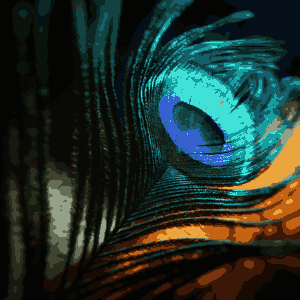

In [535]:
new

In [536]:
#new.save("kri_compressed_image_with_actual image_size.jpg")

In [538]:
@img.save("kri_compressed_image_reshape.jpg")

In [539]:
# kmeans = KMeans(n_clusters=40, random_state=0).fit(pixels)
# compressed_pixels = kmeans.cluster_centers_[kmeans.labels_].astype('uint8')